In [153]:
from sklearn.model_selection import train_test_split, cross_val_score #test regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [104]:
df = pd.read_csv('Employee.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 254.5+ KB


In [310]:
df.describe()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,2.698259,29.393295,0.597034,0.102729,2.905652,0.343864
std,0.52112,1.863377,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.00000,2015.000000,3.000000,28.000000,1.000000,0.000000,3.000000,0.000000
75%,0.00000,2017.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,2.00000,2018.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


In [86]:
columns  = df.columns.tolist()

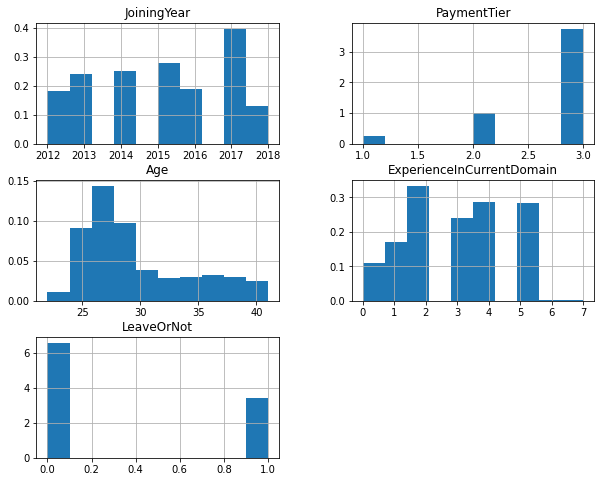

In [105]:
df.hist(figsize = (10, 8), density = True)
plt.show()

In [110]:
df = df.drop(['City'], axis =1)

In [111]:
#все признаки в количественные
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,3,34,Male,No,0,0
1,Bachelors,2013,1,28,Female,No,3,1
2,Bachelors,2014,3,38,Female,No,2,0
3,Masters,2016,3,27,Male,No,5,1
4,Masters,2017,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,3,26,Female,No,4,0
4649,Masters,2013,2,37,Male,No,2,1
4650,Masters,2018,3,27,Male,No,5,1
4651,Bachelors,2012,3,30,Male,Yes,2,0


In [112]:
le = LabelEncoder() #LabelEncodel преобразует в категории le.classes_

In [113]:
df['Education']= df[df.columns[0:1]].apply(le.fit_transform) 

In [116]:
df['Gender']= df[df.columns[4:5]].apply(le.fit_transform)

In [120]:
df['EverBenched']= df['EverBenched'].replace({'Yes':1, 'No':0}) #ручками

In [124]:
df.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,3,34,1,0,0,0
1,0,2013,1,28,0,0,3,1
2,0,2014,3,38,0,0,2,0
3,1,2016,3,27,1,0,5,1
4,1,2017,3,24,1,1,2,1


In [191]:
df.groupby('JoiningYear')['LeaveOrNot'].value_counts()

JoiningYear  LeaveOrNot
2012         0             395
             1             109
2013         0             445
             1             224
2014         0             526
             1             173
2015         0             463
             1             318
2016         0             408
             1             117
2017         0             811
             1             297
2018         1             362
             0               5
Name: LeaveOrNot, dtype: int64

In [226]:
X = df.drop(['LeaveOrNot'], axis = 1)
y = df['LeaveOrNot']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [133]:
X_train.shape, y_train.shape, y_test.shape

((3722, 7), (3722,), (931,))

In [279]:
y_test.value_counts()

0    596
1    335
Name: LeaveOrNot, dtype: int64

In [228]:
tree = DecisionTreeClassifier(random_state= 123 , criterion = 'entropy', min_impurity_decrease=0.003, max_depth = 4)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=0.003, random_state=123)

In [229]:
print(tree.score(X_train, y_train)) #c рандомной глубиной

0.8027941966684579


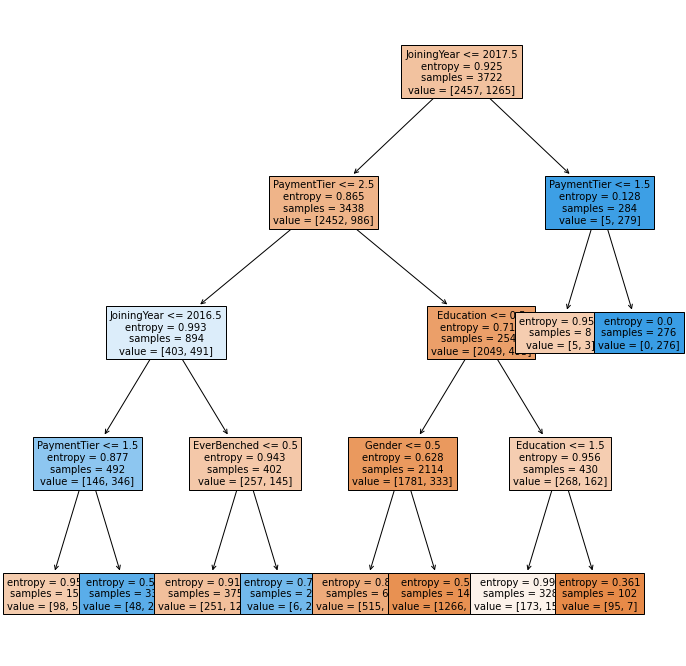

In [232]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10, feature_names = X_train.columns, filled = True)
plt.show()

In [257]:
#потестим глубину дерева
scores_data = pd.DataFrame()
for i in range(1, 25):
    TestDepthClass = DecisionTreeClassifier(criterion="entropy", max_depth= i)
    TestDepthClass.fit(X_train, y_train)
    train_score = TestDepthClass.score(X_train, y_train)    
    temp_score_data = pd.DataFrame({"max_depth": [i], "train_score":[train_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data

,max_depth,train_score
0,1,0.733745
0,2,0.757926
0,3,0.788555
0,4,0.803600
0,5,0.815153
0,6,0.826437
0,7,0.837722
0,8,0.843901
0,9,0.849812
0,10,0.857872


In [240]:
на 18 уровне дерево закончилось, т.е. распределились все вообще значения

,max_depth,train_score
0,24,0.899248


In [258]:
from sklearn.model_selection import GridSearchCV #настройка параметров
clf = DecisionTreeClassifier()
parametrs = {'criterion':['gini','entropy'], 'max_depth': range(1, 8), 'min_impurity_decrease': (0.001, 0.01)}

In [259]:
grid_search_cv_clf = GridSearchCV(clf, parametrs,  cv = 5)

In [285]:
grid_search_cv_clf.fit(X_train, y_train)
print('best_parametrs >>> ', grid_search_cv_clf.best_params_)

best_parametrs >>>  {'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.001}


Подобрав лучшие параметры пересчитаем модель с ними

In [295]:
tree1 = DecisionTreeClassifier(random_state= 123 , criterion = 'gini', min_impurity_decrease=0.001, max_depth = 7)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       random_state=123)

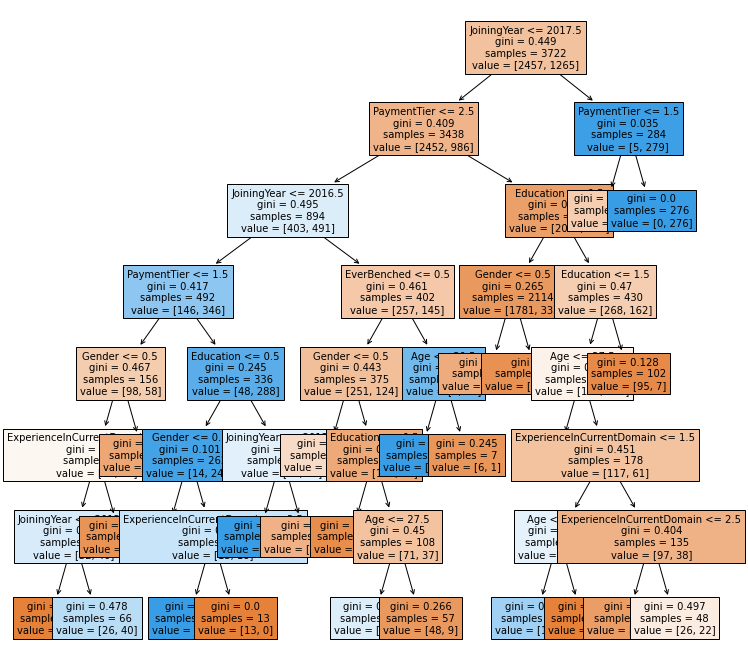

In [307]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(tree1, fontsize=10, feature_names = X_train.columns, filled = True)
plt.show()

In [204]:
#cross valid

In [296]:
cross_val_score(tree1, X_train, y_train, cv = 10)

array([0.8150134 , 0.83378016, 0.81182796, 0.81989247, 0.80376344,
       0.83333333, 0.8172043 , 0.82258065, 0.81182796, 0.81182796])

In [297]:
np.mean(cross_val_score(tree1, X_train, y_train, cv = 15)) #оценка качества

0.8156896402815564

In [301]:
y_pred = tree1.predict(X_test)

In [302]:
cross_val_score(tree1, X_test, y_test, cv = 10) #для тестовых данных

array([0.75531915, 0.74193548, 0.86021505, 0.79569892, 0.83870968,
       0.78494624, 0.87096774, 0.75268817, 0.77419355, 0.82795699])

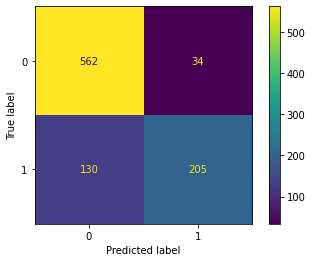

In [303]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree1, X_test, y_test)
plt.show() #TN,FP,FN,TP #проблема с 130 ложнонегативными 

In [304]:
y_test.value_counts()

0    596
1    335
Name: LeaveOrNot, dtype: int64

In [305]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, plot_roc_curve
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print(f'accuracy: {round(accuracy_score(y_test, y_pred)*100, 1)}%')


precision:  0.8577405857740585
recall:  0.6119402985074627
accuracy: 82.4%


In [306]:
feature_importances = tree1.feature_importances_ #как метрики работали в алгоритме
feature_importances_df = pd.DataFrame({'features': X_test.columns, 'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
1,JoiningYear,0.439743
2,PaymentTier,0.298735
0,Education,0.113044
4,Gender,0.050478
3,Age,0.046429
6,ExperienceInCurrentDomain,0.038062
5,EverBenched,0.013510
